In [11]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score


with open('../data/X.pkl', 'rb') as file:
    X = pickle.load(file)

with open('../data/Y.pkl', 'rb') as file:
    y = pickle.load(file)

train_length = int((7 * X.shape[0])/10)

X_train, X_test = X[:train_length], X[train_length:]
y_train, y_test = y[:train_length], y[train_length:]


In [12]:
from sklearn.model_selection import GridSearchCV

classificator = KNeighborsClassifier()
n_list = list(range(1, 10))

param_grid = {'n_neighbors': n_list, 'p': [1, 2]}
#minkowski metrics for p 1 metric = manhattan, for p 2  metric = euclidan

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)





GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'p': [1, 2]},
             return_train_score=True, scoring='accuracy')

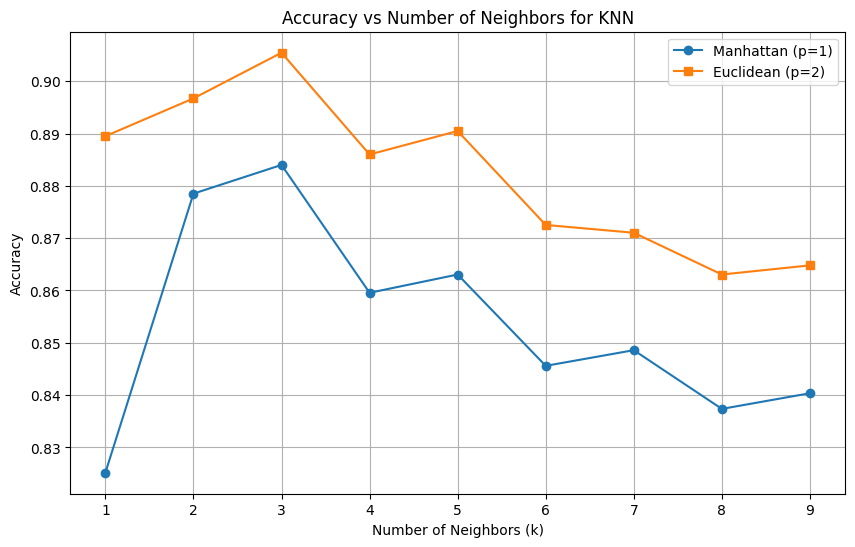

In [13]:
results = grid_search.cv_results_

mean_test_scores = results['mean_test_score']
params = results['params']

scores_p1 = [mean_test_scores[i] for i in range(len(params)) if params[i]['p'] == 1]
scores_p2 = [mean_test_scores[i] for i in range(len(params)) if params[i]['p'] == 2]

plt.figure(figsize=(10, 6))
plt.plot(n_list, scores_p1, label='Manhattan (p=1)', marker='o')
plt.plot(n_list, scores_p2, label='Euclidean (p=2)', marker='s')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Neighbors for KNN')
plt.legend()
plt.grid(True)
plt.savefig('../results/knn_accuracy_plot.png', format='png')
plt.show()

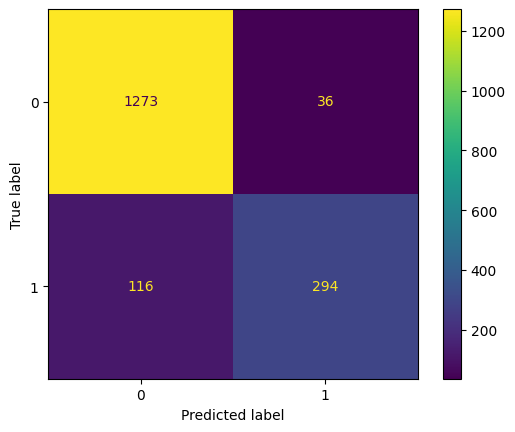

In [20]:

classificator = KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'], p=grid_search.best_params_['p'])
classificator.fit(X_train, y_train)

predict = classificator.predict(X_test.toarray())

cm = confusion_matrix(y_test, predict)
cm_display = ConfusionMatrixDisplay(cm).plot()
accuracy_score(y_test, predict)
plt.savefig('../results/confusion_matrix_knn.png', format='png')